In [37]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


In [38]:
pip install ucimlrepo

In [39]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [40]:
import pandas as pd

# The dataset was already fetched as 'breast_cancer_wisconsin_diagnostic'
# X and y are already available from the previous cell.
# Concatenate X and y to create the full DataFrame
breast_cancer_df = pd.concat([X, y], axis=1)

# The column names can be set after concatenation if needed,
# but ucimlrepo already provides meaningful names for X and y.
# For example, to align with the 'column_names' list provided in the original cell,
# we can rename columns, but this isn't strictly necessary if X and y already have good names.
# Let's inspect the columns of the new breast_cancer_df to confirm.
print(breast_cancer_df.head())

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0      0.3001          0.14710     0.2419             0.07871  ...     17.33   
1      0.0869          0.07017     0.1812             0.05667  ...     23.41   
2      0.1974          0.12790     0.2069             0.05999  ...     25.53   
3      0.2414          0.10520     0.2597             0.09744  ...     26.50   
4      0.1980          0.10430     0.1809             0.05883  ...     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.

In [41]:
# Count samples of each class
unique_classes, counts = np.unique(breast_cancer_df["Diagnosis"], return_counts=True)

# Display the results
for cl, count in zip(unique_classes, counts):
  print(f'Class {cl}: {count} samples')

Class B: 357 samples
Class M: 212 samples


In [42]:
num_samples = breast_cancer_df.shape[0]
num_features = breast_cancer_df.shape[1]-2
num_classes = len(unique_classes)
print("Number of samples is", num_samples, "and number of features is", num_features, "and number of classes is", num_classes)

Number of samples is 569 and number of features is 29 and number of classes is 2


In [43]:
# Create a mapping dictionary in order to convert class names to numerical values
class_mapping = {'B': 0, 'M': 1}

# Apply the mapping to the 'class' column, add a new column that is numerical encoded
breast_cancer_df['class_encoded'] = breast_cancer_df['Diagnosis'].map(class_mapping)

In [44]:
breast_cancer_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis,class_encoded
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M,1


In [45]:
breast_cancer_df = breast_cancer_df.drop("Diagnosis", axis=1) # Drop Diagnosis column

In [46]:
# Extract features and convert it to a NumPy array
x_data = breast_cancer_df.iloc[:, :num_features].values
# Extract the last column (labels) and convert it to a NumPy array
y_data = breast_cancer_df.iloc[:, -1].values # labels must have numerical values

In [47]:
print(x_data.shape)
print(y_data.shape)

(569, 29)
(569,)


Α

In [48]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Define RANDOM_SEED for reproducibility
RANDOM_SEED = 42

# Split 70% Training - 30% Testing
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=RANDOM_SEED)

# Print the sizes
print("Size of X_train:", len(X_train))
print("Size of X_test:", len(X_test))
print("Size of y_train:", len(y_train))
print("Size of y_test:", len(y_test))

Size of X_train: 398
Size of X_test: 171
Size of y_train: 398
Size of y_test: 171


Β

In [50]:
# Function to simulate missing values
def introduce_missing_values(X: np.ndarray, percentage: float):
    missing_mask = np.random.rand(*X.shape) < percentage
    X_missing = X.copy()
    X_missing[missing_mask] = np.nan
    return X_missing

np.random.seed(RANDOM_SEED)
missing_persentage = 0.10 # 10% missing values
X_train_missing = introduce_missing_values(X_train, missing_persentage) # Introduce missing values to the training set

print("Missing values are 10% of the training data.")
print("Missing values for each feature are")
print(np.sum(np.isnan(X_train_missing), axis=0))

Missing values are 10% of the training data.
Missing values for each feature are
[42 45 35 42 42 52 39 36 49 36 41 37 44 42 53 41 36 31 37 48 51 31 36 38
 39 31 42 34 46]


In [51]:
nan_counts = np.sum(np.isnan(X_train_missing))

print("Total number of values in training set is:", num_features*X_train.shape[0])
print("Total number of missing values is:", nan_counts)
print(f"Percentage of missing values in training set is: {round(nan_counts*100 / (num_features*X_train.shape[0]), 2)}%")

Total number of values in training set is: 11542
Total number of missing values is: 1176
Percentage of missing values in training set is: 10.19%


In [52]:
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)

# Train
tree_classifier.fit(X_train, y_train)

# Make predictions
y_pred = tree_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with 0% missing values. Accuracy of the tree classifier is {accuracy*100:.2f}%")

Train with 0% missing values. Accuracy of the tree classifier is 94.74%


In [53]:
# descision tree classifier with max depth 5, with missing values
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)

# Train
tree_classifier.fit(X_train_missing, y_train)

# Make predictions
y_pred = tree_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the tree classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the tree classifier is 92.98%


Γ

Με τα ίδια training και test sets να εκπαιδεύσετε ένα random forest (RF) με 100 ταξινομητές
μέγιστου βάθους 3, χρησιμοποιώντας 5 features ανά δένδρο χωρίς bootstrapping των training
δεδομένων. Να υπολογίσετε την ακρίβεια πρόβλεψης του RF στο test set

In [54]:
# Implement a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5, bootstrap=False, random_state=42)
rf_classifier.fit(X_train_missing, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Train random forest with {missing_persentage*100:.1f}% missing values. Accuracy {accuracy_rf*100:.1f}%")

Train random forest with 10.0% missing values. Accuracy 96.5%


θα προσπαθησω να την ανεβασω λιγο την αποδοση

In [55]:
# Random Forest classifier with max depth 3, 100 trees, without missing values
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5, bootstrap=False, random_state=RANDOM_SEED)

# Train the Random Forest on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the Random Forest
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with 0% missing values. Accuracy of the random forest classifier is {accuracy*100:.2f}%")

Train with 0% missing values. Accuracy of the random forest classifier is 96.49%


In [56]:
# Random Forest classifier with max depth 3, 100 trees, with missing values -> not supported from sklearn
num_trees = 100
predictions = []

for i in range(num_trees):
  # Tree classifier
  tree_classifier = DecisionTreeClassifier(max_depth=3, max_features=5, random_state=RANDOM_SEED+i)

  # Train
  tree_classifier.fit(X_train_missing, y_train)

  y_pred = tree_classifier.predict(X_test)
  predictions.append(y_pred)



ensemble_predictions = np.mean(predictions, axis=0) > 0.5

# Evaluate the forest
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the random forest classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the random forest classifier is 97.08%


Δ

Υπολογίστε το feature importance για τον δενδρικό ταξινομητή και το RF. Σχολιάστε τα μέχρι
τώρα αποτελέσματα και τις διαφορές που παρατηρείτε.

In [57]:
# Decision tree with max depth 5, with missing values
tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)

# Train
tree_classifier.fit(X_train_missing, y_train)

# Make predictions
y_pred = tree_classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the tree classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the tree classifier is 92.98%


In [58]:
# Calculate feature importance for the tree
feature_importance = tree_classifier.feature_importances_

# Get the feature names from the DataFrame used for training
# X_train was created from breast_cancer_df.iloc[:, :num_features]
feature_names_list = breast_cancer_df.columns[:num_features]

print(f"Features                    Importance")
for i, importance in enumerate(feature_importance):
  print(f"{i+1:2d} - {feature_names_list[i]:25s} {importance:.4f}")

Features                    Importance
 1 - radius1                   0.0000
 2 - texture1                  0.0318
 3 - perimeter1                0.0309
 4 - area1                     0.0000
 5 - smoothness1               0.0107
 6 - compactness1              0.0000
 7 - concavity1                0.0000
 8 - concave_points1           0.0000
 9 - symmetry1                 0.0000
10 - fractal_dimension1        0.0000
11 - radius2                   0.0000
12 - texture2                  0.0108
13 - perimeter2                0.0000
14 - area2                     0.0225
15 - smoothness2               0.0000
16 - compactness2              0.0083
17 - concavity2                0.0000
18 - concave_points2           0.0000
19 - symmetry2                 0.0000
20 - fractal_dimension2        0.0193
21 - radius3                   0.1935
22 - texture3                  0.0011
23 - perimeter3                0.0160
24 - area3                     0.0000
25 - smoothness3               0.0000
26 - compac

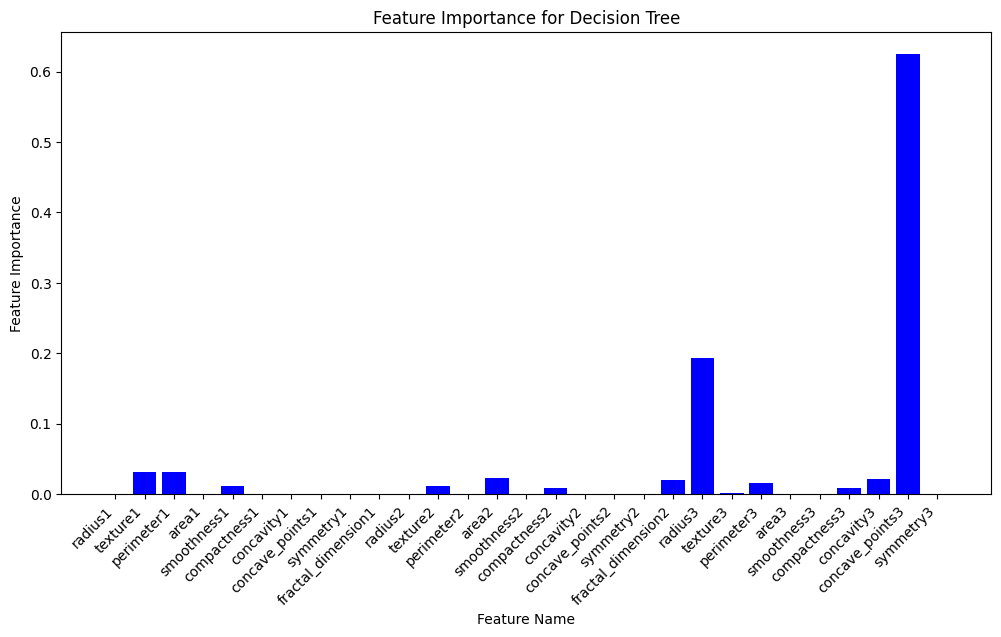

In [59]:
#  plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance, color='blue')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Decision Tree')
plt.xticks(range(len(feature_importance)), feature_names_list, rotation=45, ha='right', fontsize=10)
plt.show()

In [60]:
num_trees = 100
predictions = []
feature_importances = []

for i in range(num_trees):
  # Tree classifier
  tree_classifier = DecisionTreeClassifier(max_depth=3, max_features=5, random_state=RANDOM_SEED+i)

  # Train
  tree_classifier.fit(X_train_missing, y_train)

  # Make predictions
  y_pred = tree_classifier.predict(X_test)
  predictions.append(y_pred)

  # Feature importance
  feature_importance = tree_classifier.feature_importances_
  feature_importances.append(feature_importance)


# Combine predictions using majority voting
ensemble_predictions = np.mean(predictions, axis=0) > 0.5

# Evaluate the forest
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Train with {missing_persentage*100}% missing values. Accuracy of the random forest classifier is {accuracy*100:.2f}%")

Train with 10.0% missing values. Accuracy of the random forest classifier is 97.08%


In [61]:
feature_importance = np.nanmean(feature_importances, axis=0) # if there is nan value ignore it

# Get the feature names from the DataFrame used for training, as was done for the Decision Tree
feature_names_list = breast_cancer_df.columns[:num_features]

print(f"Features                    Importance")
for i, importance in enumerate(feature_importance):
  print(f"{i+1:2d} - {feature_names_list[i]:25s} {importance:.4f}")

Features                    Importance
 1 - radius1                   0.0382
 2 - texture1                  0.0072
 3 - perimeter1                0.0879
 4 - area1                     0.0803
 5 - smoothness1               0.0019
 6 - compactness1              0.0006
 7 - concavity1                0.0760
 8 - concave_points1           0.1284
 9 - symmetry1                 0.0004
10 - fractal_dimension1        0.0017
11 - radius2                   0.0198
12 - texture2                  0.0020
13 - perimeter2                0.0050
14 - area2                     0.0326
15 - smoothness2               0.0009
16 - compactness2              0.0005
17 - concavity2                0.0030
18 - concave_points2           0.0013
19 - symmetry2                 0.0022
20 - fractal_dimension2        0.0042
21 - radius3                   0.1067
22 - texture3                  0.0138
23 - perimeter3                0.0718
24 - area3                     0.0944
25 - smoothness3               0.0037
26 - compac

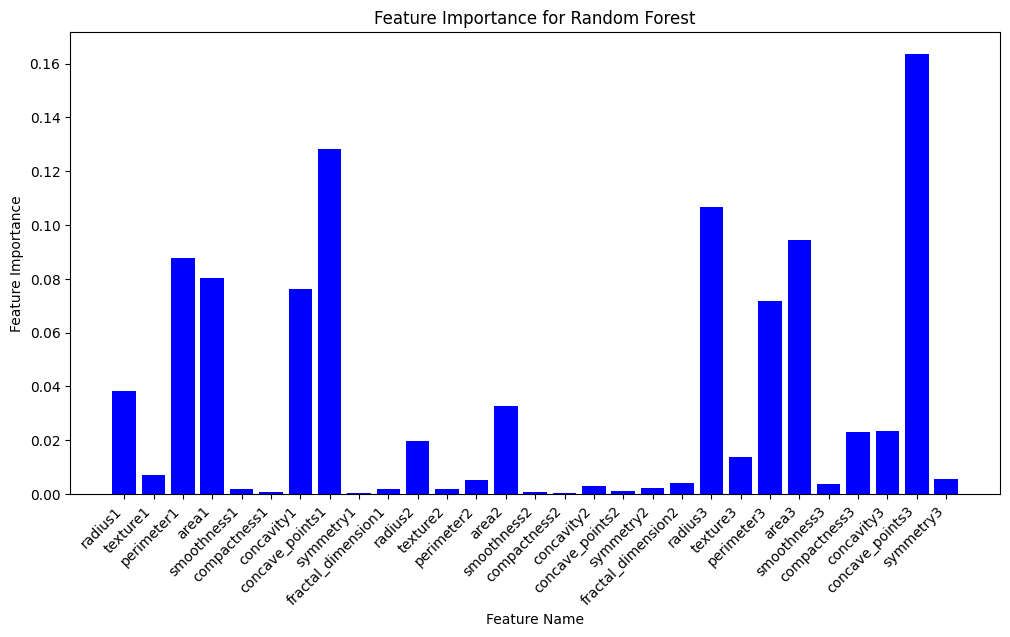

In [62]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance, color='blue')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.xticks(range(len(feature_importance)), feature_names_list, rotation=45, ha='right', fontsize=10)
plt.show()

Παρατηρούμε ότι στον tree classifier τα σημαντικά χαρακτηριστικά είναι λίγα (τα πιο σημαντικά χαρακτηριστικά ). Στο RF τα σημαντικά χαρακτηριστικά είναι πολύ
περισσότερα,αλλά οι τιμές σημαντικότητας του κάθε χαρακτηριστικού είναι
μικρότερες από τις τιμές του tree classifier. . Οπότε, στο RF δίνεται βαρύτητα σε πολλά
χαρακτηριστικά, δηλαδή διερευνώνται πολλές περιοχές λύσεων, σε αντίθεση με τον tree
classifier που χρησιμοποιεί μόνο ένα πολύ μικρό υποσύνολο των χαρακτηριστικών. Για αυτό
το λόγο, όπως αναφέραμε και στο ερώτημα Γ, ο RF σχεδόν πάντα καταλήγει σε καλύτερη
λύση.

Ε

Να εκπαιδεύσετε το ίδιο RF για μεταβλητό ποσοστό missing values (0% έως 80% ανά 10%)
και για κάθε forest να υπολογίσετε το classification accuracy εισάγοντας στο test set
μεταβλητό ποσοστό missing values (0% έως 80% ανά 10%). Απεικονίστε κατάλληλα τη
συνολική συμπεριφορά της ακρίβειας του RF ταξινομητή σε σχέση με το ποσοστό missing
values. Σχολιάστε την αντοχή του random forest στα missing data, τόσο στο training όσο και
στο testing. Σε ποιο από τα δύο είδη missing data είναι περισσότερο ευαίσθητος?


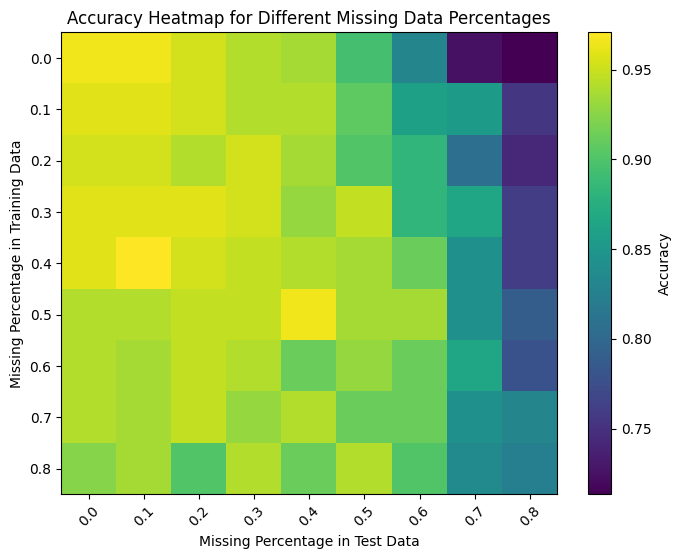

In [63]:
pers = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
accs = np.empty((9,9))
for i in range(0,9):
    X_train_missing = introduce_missing_values(X_train, pers[i])
    for j in range(0,9):
        X_test_missing = introduce_missing_values(X_test, pers[j])
        rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5, bootstrap=False, random_state=42)
        rf_classifier.fit(X_train_missing, y_train)

        y_pred_rf = rf_classifier.predict(X_test_missing)

        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        accs[i][j] = accuracy_rf

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(accs, interpolation='nearest', cmap='viridis', aspect='auto')
plt.colorbar(label='Accuracy')
plt.xticks(ticks=np.arange(len(pers)), labels=pers, rotation=45)
plt.yticks(ticks=np.arange(len(pers)), labels=pers)
plt.xlabel('Missing Percentage in Test Data')
plt.ylabel('Missing Percentage in Training Data')
plt.title('Accuracy Heatmap for Different Missing Data Percentages')
plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

def train_random_forest(
    X_train, y_train,
    X_test, y_test,
    n_estimators=100,
    max_depth=3,
    max_features=5,
    random_state=0
):
    """
    Εκπαιδεύει ένα Random Forest, επιστρέφει προβλέψεις, πιθανότητες και accuracy.
    """
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        random_state=random_state,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    y_proba = rf.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)

    return y_pred, y_proba, acc


In [65]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

missing_percentages = [round(x * 0.1, 1) for x in range(0, 9)]  # 0.0 έως 0.8 ανά 0.1

def evaluate_rf_with_missing(
    X_train, y_train,
    X_test, y_test,
    missing_perc_list,
    n_estimators=100,
    max_depth=3,
    max_features=5,
    random_state=RANDOM_SEED
):
    """
    Για κάθε ποσοστό missing στο training και στο test,
    εκπαιδεύει ένα νέο Random Forest και υπολογίζει το accuracy.

    Επιστρέφει:
      - acc_matrix: πίνακας [len(missing_perc_list) x len(missing_perc_list)]
        όπου γραμμές = ποσοστό missing στο train,
              στήλες = ποσοστό missing στο test
    """
    n = len(missing_perc_list)
    acc_matrix = np.zeros((n, n))

    for i, per_train in enumerate(missing_perc_list):
        # Εισαγωγή missing στο training set
        X_train_missing = introduce_missing_values(X_train, per_train)

        # Εκπαίδευση RF σε αυτό το training set
        # (ίδια hyperparameters για όλα τα πειράματα)
        for j, per_test in enumerate(missing_perc_list):
            X_test_missing = introduce_missing_values(X_test, per_test)

            _, _, acc = train_random_forest(
                X_train=X_train_missing,
                y_train=y_train,
                X_test=X_test_missing,
                y_test=y_test,
                n_estimators=n_estimators,
                max_depth=max_depth,
                max_features=max_features,
                random_state=random_state
            )

            acc_matrix[i, j] = acc
            print(f"Train missing: {per_train*100:.0f}%, Test missing: {per_test*100:.0f}%, Accuracy: {acc*100:.2f}%")

    return acc_matrix

# Κλήση της συνάρτησης
acc_array = evaluate_rf_with_missing(
    X_train, y_train,
    X_test, y_test,
    missing_percentages,
    n_estimators=100,
    max_depth=3,
    max_features=5,
    random_state=RANDOM_SEED
)


Train missing: 0%, Test missing: 0%, Accuracy: 97.08%
Train missing: 0%, Test missing: 10%, Accuracy: 97.66%
Train missing: 0%, Test missing: 20%, Accuracy: 96.49%
Train missing: 0%, Test missing: 30%, Accuracy: 94.15%
Train missing: 0%, Test missing: 40%, Accuracy: 93.57%
Train missing: 0%, Test missing: 50%, Accuracy: 89.47%
Train missing: 0%, Test missing: 60%, Accuracy: 83.63%
Train missing: 0%, Test missing: 70%, Accuracy: 76.61%
Train missing: 0%, Test missing: 80%, Accuracy: 69.59%
Train missing: 10%, Test missing: 0%, Accuracy: 96.49%
Train missing: 10%, Test missing: 10%, Accuracy: 95.91%
Train missing: 10%, Test missing: 20%, Accuracy: 96.49%
Train missing: 10%, Test missing: 30%, Accuracy: 94.15%
Train missing: 10%, Test missing: 40%, Accuracy: 95.32%
Train missing: 10%, Test missing: 50%, Accuracy: 93.57%
Train missing: 10%, Test missing: 60%, Accuracy: 88.30%
Train missing: 10%, Test missing: 70%, Accuracy: 83.04%
Train missing: 10%, Test missing: 80%, Accuracy: 70.76%
Tra

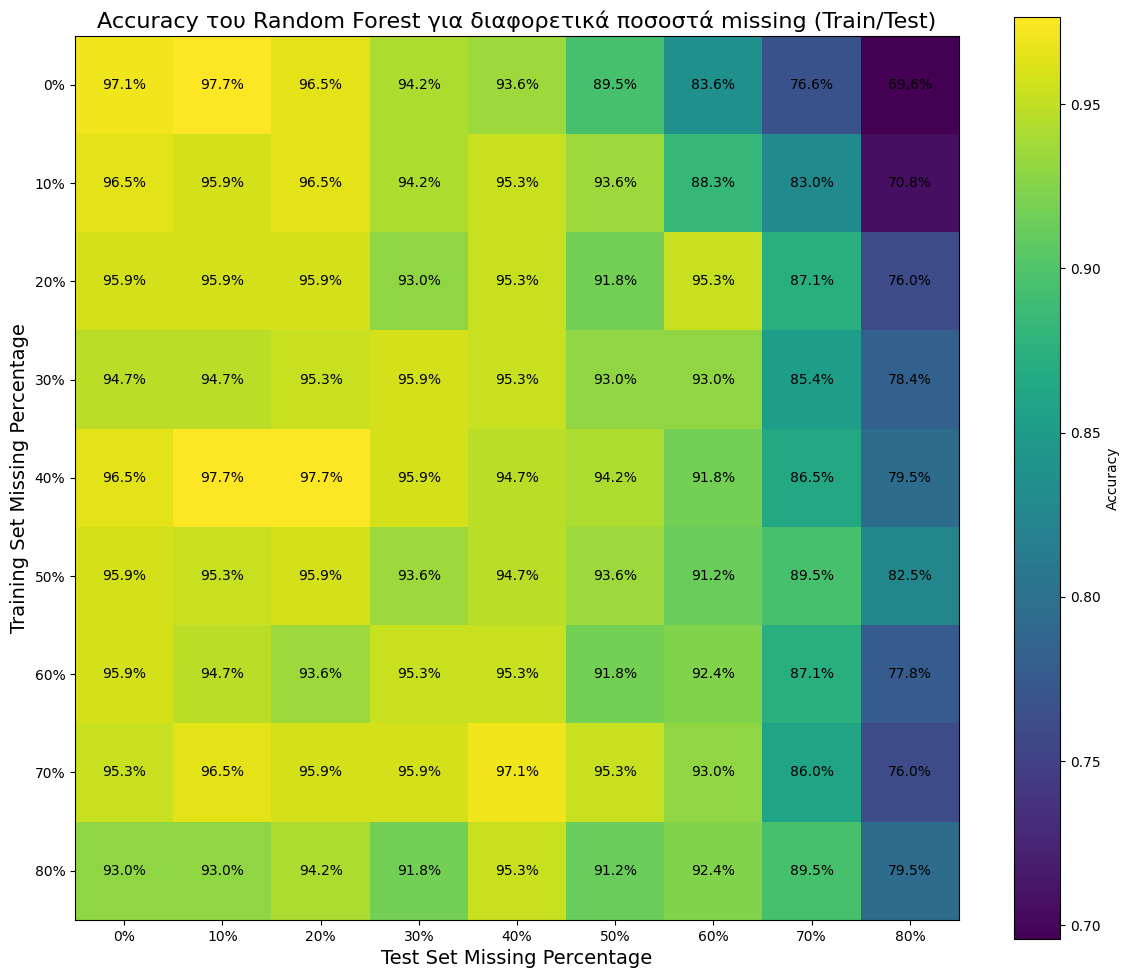

In [66]:
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(acc_array, cmap='viridis')

# Άξονες
ax.set_xticks(np.arange(len(missing_percentages)))
ax.set_yticks(np.arange(len(missing_percentages)))
ax.set_xticklabels([f'{p*100:.0f}%' for p in missing_percentages])
ax.set_yticklabels([f'{p*100:.0f}%' for p in missing_percentages])

ax.set_xlabel('Test Set Missing Percentage', fontsize=14)
ax.set_ylabel('Training Set Missing Percentage', fontsize=14)
ax.set_title('Accuracy του Random Forest για διαφορετικά ποσοστά missing (Train/Test)', fontsize=16)

# Εμφάνιση accuracy πάνω στο heatmap
for i in range(len(missing_percentages)):
    for j in range(len(missing_percentages)):
        ax.text(
            j, i,
            f'{acc_array[i, j]*100:.1f}%',
            ha='center', va='center',
            color='black', fontsize=10
        )

plt.colorbar(im, ax=ax, label='Accuracy')
plt.tight_layout()
plt.show()


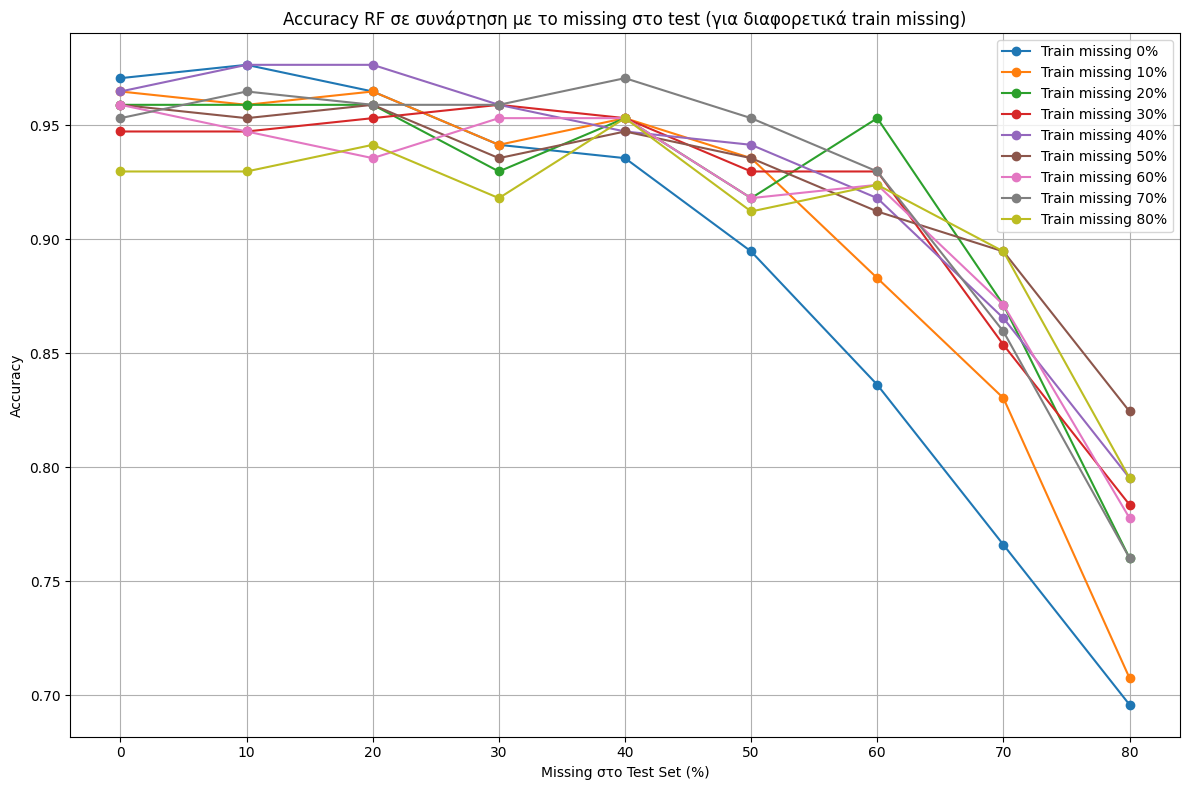

In [67]:
plt.figure(figsize=(12, 8))

test_percentages = np.array(missing_percentages) * 100

for i, per_train in enumerate(missing_percentages):
    plt.plot(
        test_percentages,
        acc_array[i, :],
        marker='o',
        label=f'Train missing {per_train*100:.0f}%'
    )

plt.title('Accuracy RF σε συνάρτηση με το missing στο test (για διαφορετικά train missing)')
plt.xlabel('Missing στο Test Set (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


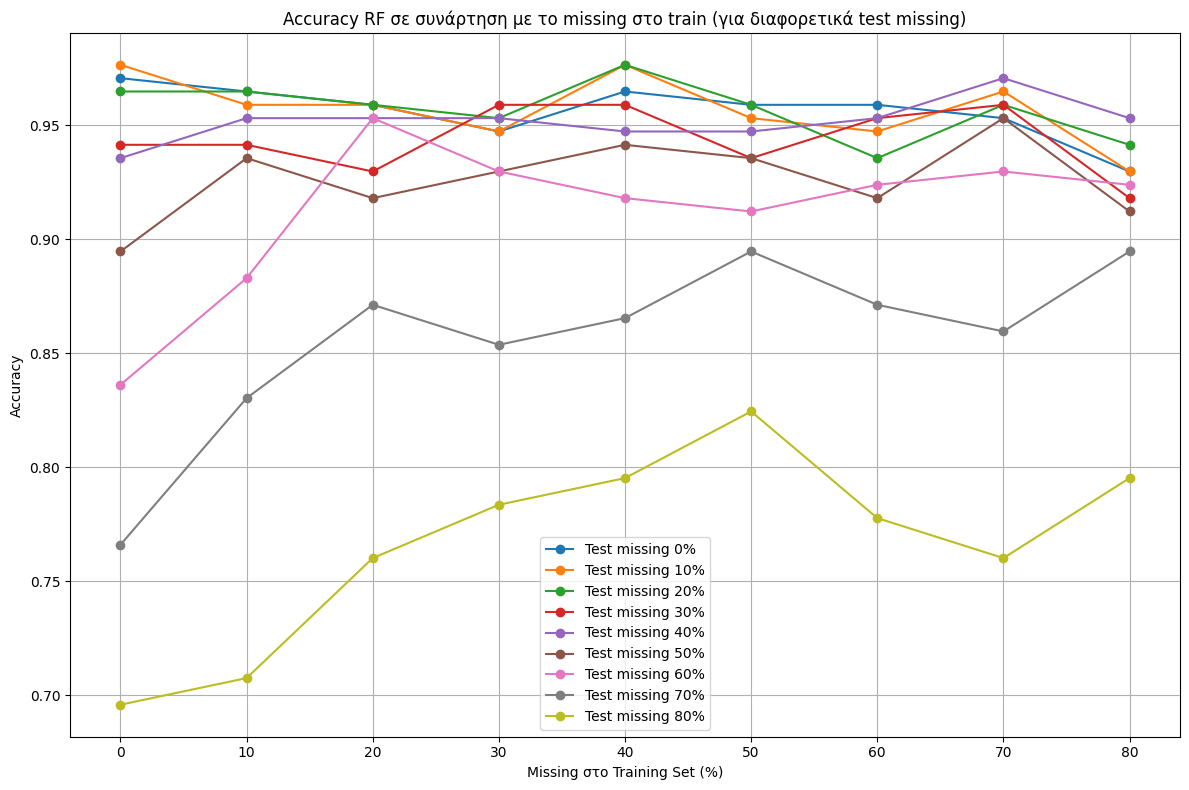

In [68]:
plt.figure(figsize=(12, 8))

train_percentages = np.array(missing_percentages) * 100
acc_array_T = acc_array.T

for j, per_test in enumerate(missing_percentages):
    plt.plot(
        train_percentages,
        acc_array_T[j, :],
        marker='o',
        label=f'Test missing {per_test*100:.0f}%'
    )

plt.title('Accuracy RF σε συνάρτηση με το missing στο train (για διαφορετικά test missing)')
plt.xlabel('Missing στο Training Set (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Στο πλαίσιο του πειραματικού σεναρίου εξετάστηκε η επίδραση διαφορετικών ποσοστών ελλιπών δεδομένων (missing values) τόσο στο σύνολο εκπαίδευσης (training set) όσο και στο σύνολο ελέγχου (test set) στην απόδοση ενός Random Forest Classifier. Συγκεκριμένα, το ποσοστό των missing values μεταβαλλόταν από 0% έως 80% με βήμα 10% για κάθε ένα από τα δύο σύνολα, ενώ για κάθε συνδυασμό υπολογιζόταν η ταξινομητική ακρίβεια. Τα αποτελέσματα απεικονίστηκαν με heatmap και καμπύλες μεταβολής της ακρίβειας συναρτήσει του ποσοστού ελλιπών δεδομένων.

Παρατηρήσεις από τα Πειραματικά Αποτελέσματα

Από τα διαγράμματα παρατηρείται ότι όταν το ποσοστό των missing values είναι χαμηλό (0%–20%) στα δύο σύνολα δεδομένων, η ακρίβεια του Random Forest παραμένει υψηλή και σταθερή. Αυτό υποδηλώνει ότι το μοντέλο εμφανίζει καλή ανθεκτικότητα σε μικρού βαθμού απώλεια πληροφορίας, αξιοποιώντας επαρκώς τις διαθέσιμες τιμές των χαρακτηριστικών.

Καθώς αυξάνεται το ποσοστό των missing values στο training set, η απόδοση μειώνεται προοδευτικά, αλλά η πτώση είναι σχετικά ομαλή για μεσαία επίπεδα απώλειας δεδομένων. Αυτό εξηγείται από τη φύση του Random Forest:

χρησιμοποιεί bagging, επομένως κάθε δέντρο εκπαιδεύεται σε διαφορετικό bootstrap δείγμα,

επιλέγει τυχαίο υποσύνολο χαρακτηριστικών σε κάθε split,
με αποτέλεσμα ακόμη και αν ορισμένα χαρακτηριστικά περιέχουν missing values, τα υπόλοιπα να μπορούν να συνεισφέρουν επαρκή πληροφορία για τη δημιουργία αποδοτικών decision boundaries. Έτσι, το μοντέλο μπορεί να εξακολουθήσει να μαθαίνει ικανοποιητικά πρότυπα, τουλάχιστον μέχρι κάποιο όριο.

Αντίθετα, η αύξηση του ποσοστού των missing values στο test set οδηγεί σε πιο απότομη και έντονη επιδείνωση της ακρίβειας. Όταν ένα σημαντικό μέρος των χαρακτηριστικών απουσιάζει από τα δείγματα που καλείται να ταξινομήσει το ήδη εκπαιδευμένο μοντέλο, η διαθέσιμη πληροφορία για λήψη απόφασης μειώνεται δραστικά. Επομένως, ακόμη και ένα καλά εκπαιδευμένο μοντέλο δεν μπορεί να παράγει αξιόπιστες προβλέψεις αν τα test instances έχουν περιορισμένη πληροφορία. Η πτώση γίνεται ιδιαίτερα εμφανής για ποσοστά missing μεγαλύτερα περίπου του 50%–60%.

Σύνοψη και Συμπεράσματα

Συνολικά, το Random Forest εμφανίζει υψηλή αντοχή σε moderate missing values στο training set, χάρη στον ensemble χαρακτήρα του και στη στοχαστική επιλογή χαρακτηριστικών και δειγμάτων. Ωστόσο, είναι σαφώς πιο ευαίσθητο στα missing values του test set, όπου η απόδοση υποβαθμίζεται ταχύτερα καθώς αυξάνεται η απώλεια πληροφορίας.

Κατά συνέπεια, μπορούμε να συμπεράνουμε ότι:

το Random Forest είναι σχετικά robust όταν το training data περιέχει ελλιπή δεδομένα,

η ακρίβεια εξαρτάται πολύ ισχυρότερα από την πληρότητα των δεδομένων στο test set,

η απώλεια πληροφορίας κατά την αξιολόγηση είναι πιο κρίσιμη σε σχέση με την απώλεια πληροφορίας κατά την εκπαίδευση.

Αυτό αναδεικνύει τη σημασία κατάλληλων τεχνικών διαχείρισης missing data, ιδιαίτερα στο test ή σε real-world deployment σενάρια, όπως imputation ή χρήση μεθόδων ειδικά σχεδιασμένων για δεδομένα με ελλείψεις.

ΣΤ

Να εκπαιδεύσετε έναν δενδρικό ταξινομητή και έναν RF ταξινομητή όπως στα προηγούμενα,
για 10% missing data στο training set. Υπολογίστε τις καμπύλες precision-recall για τους δύο
ταξινομητές1
(χωρίς missing data στο test set). Ποιος ταξινομητής έχει καλύτερη
συμπεριφορά και γιατί? Δεδομένου ότι οι ταξινομητές που εκπαιδεύσατε αποτελούν
συστήματα πρόβλεψης της κακοήθειας όγκων, ποια χαρακτηριστικά της καμπύλης έχουν
περισσότερη βαρύτητα κατά την πρακτική εφαρμογή?

Train with 10% missing values. Accuracy of the Decision Tree classifier is 92.98%
Train with 10% missing values. Accuracy of the Random Forest classifier is 97.08%


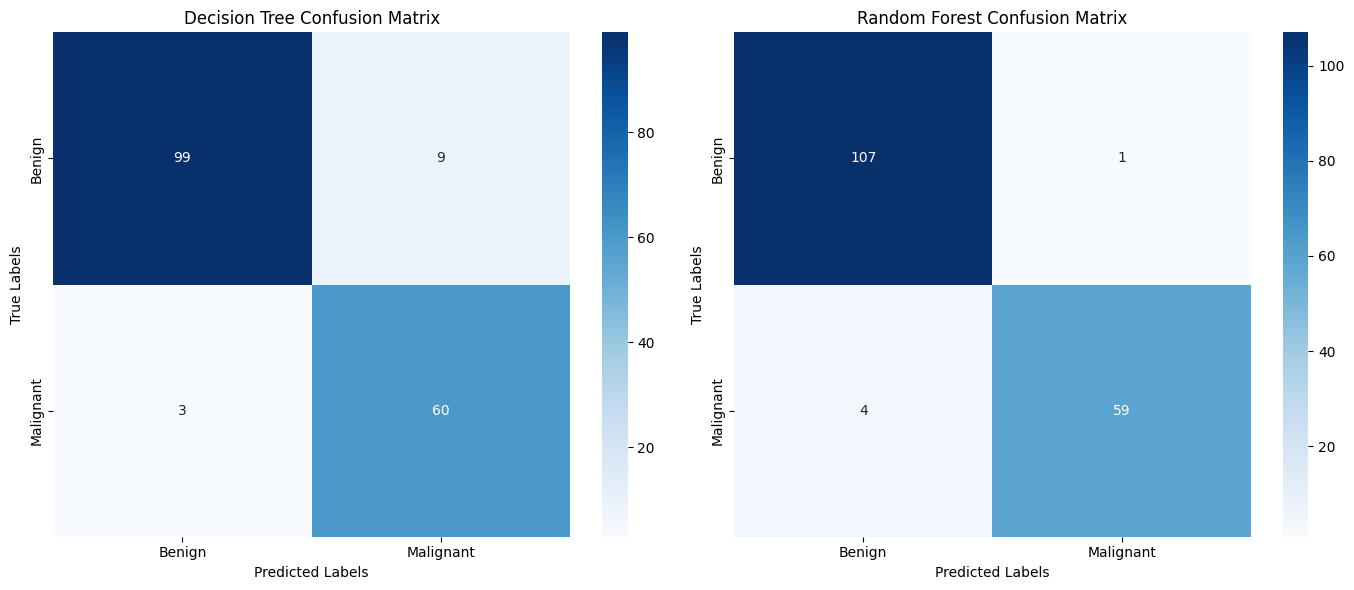

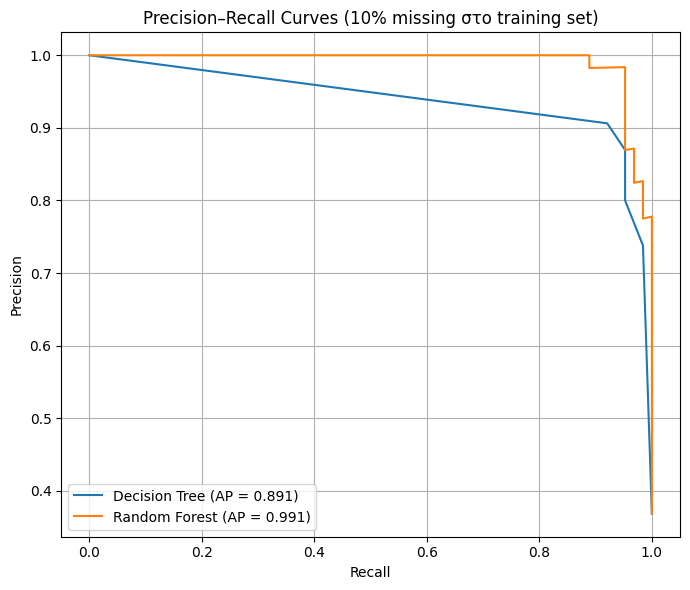

Average Precision (Decision Tree): 0.8912
Average Precision (Random Forest): 0.9906


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_recall_curve,
    average_precision_score
)

np.random.seed(RANDOM_SEED)

# Define the custom random_forest function
def random_forest(
    num_trees,
    max_depth,
    max_features,
    random_state,
    X_train,
    y_train,
    X_test,
    y_test
):
    predictions = []
    probabilities = []

    for i in range(num_trees):
        tree_classifier = DecisionTreeClassifier(
            max_depth=max_depth,
            max_features=max_features,
            random_state=random_state + i
        )

        # Train the tree on the (potentially missing) training data
        tree_classifier.fit(X_train, y_train)

        # Make predictions for current tree
        y_pred_tree = tree_classifier.predict(X_test)
        predictions.append(y_pred_tree)

        # Get probabilities for current tree
        y_proba_tree = tree_classifier.predict_proba(X_test)
        probabilities.append(y_proba_tree)

    # Combine predictions using majority voting
    # Convert list of arrays to 2D array, then sum and average
    ensemble_predictions = (np.mean(predictions, axis=0) > 0.5).astype(int)

    # Combine probabilities by averaging
    ensemble_probabilities = np.mean(probabilities, axis=0)

    return ensemble_predictions, ensemble_probabilities


# 1) Εισαγωγή 10% missing στο training set
missing_percentage = 0.10  # 10% missing values
X_train_missing = introduce_missing_values(X_train, missing_percentage)

# ===========================
# 2) Decision Tree classifier
# ===========================
tree_classifier = DecisionTreeClassifier(
    max_depth=5,
    random_state=RANDOM_SEED
)

tree_classifier.fit(X_train_missing, y_train)

# Προβλέψεις & πιθανότητες στο ΚΑΘΑΡΟ test set
y_pred_dt = tree_classifier.predict(X_test)
probs_dt = tree_classifier.predict_proba(X_test)   # shape (N, 2)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Train with {missing_percentage*100:.0f}% missing values. "
      f"Accuracy of the Decision Tree classifier is {accuracy_dt*100:.2f}%")

# ===========================
# 3) Random Forest “χειροποίητο” (η δική σου random_forest)
# ===========================
ensemble_preds, ensemble_probs = random_forest(
    num_trees=100,
    max_depth=3,
    max_features=5,
    random_state=RANDOM_SEED,
    X_train=X_train_missing,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

accuracy_rf = accuracy_score(y_test, ensemble_preds)
print(f"Train with {missing_percentage*100:.0f}% missing values. "
      f"Accuracy of the Random Forest classifier is {accuracy_rf*100:.2f}%")

# ===========================
# 4) Confusion matrices (πλευρό-πλευρό)
# ===========================
classes = ["Benign", "Malignant"]  # 0 = Benign, 1 = Malignant

cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, ensemble_preds)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

# ===========================
# 5) Precision–Recall curves για ΔΥΟ ταξινομητές στο ΙΔΙΟ plot
# ===========================
from sklearn.metrics import auc  # αν θες και PR-AUC με trapz

def plot_pr_two_models(y_true, probs_dt, probs_rf):
    """
    y_true: ground truth labels (0/1)
    probs_dt: probabilities για κλάση 1 από DT, shape (N, 2) ή (N,)
    probs_rf: probabilities για κλάση 1 από RF, shape (N, 2) ή (N,)
    """
    # Αν είναι 2D, κρατάμε τη στήλη 1
    if probs_dt.ndim == 2:
        probs_dt_pos = probs_dt[:, 1]
    else:
        probs_dt_pos = probs_dt

    if probs_rf.ndim == 2:
        probs_rf_pos = probs_rf[:, 1]
    else:
        probs_rf_pos = probs_rf

    precision_dt, recall_dt, _ = precision_recall_curve(y_true, probs_dt_pos)
    precision_rf, recall_rf, _ = precision_recall_curve(y_true, probs_rf_pos)

    ap_dt = average_precision_score(y_true, probs_dt_pos)
    ap_rf = average_precision_score(y_true, probs_rf_pos)

    plt.figure(figsize=(7, 6))
    plt.plot(recall_dt, precision_dt,
             label=f'Decision Tree (AP = {ap_dt:.3f})')
    plt.plot(recall_rf, precision_rf,
             label=f'Random Forest (AP = {ap_rf:.3f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision–Recall Curves (10% missing στο training set)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Average Precision (Decision Tree): {ap_dt:.4f}")
    print(f"Average Precision (Random Forest): {ap_rf:.4f}")

# Κλήση της συνάρτησης
plot_pr_two_models(y_test, probs_dt, ensemble_probs)


Για την αξιολόγηση της επίδρασης των missing values εκπαιδεύτηκαν ένας δενδρικός ταξινομητής (Decision Tree) και ένας Random Forest ταξινομητής με 100 δέντρα σε training set με 10% missing data, ενώ το test set παρέμεινε πλήρες (χωρίς ελλείψεις). Για τους δύο ταξινομητές υπολογίστηκαν οι καμπύλες precision–recall και ο δείκτης Average Precision (AP).

Από τα αποτελέσματα των καμπυλών precision–recall προκύπτει ότι ο Random Forest παρουσιάζει σαφώς καλύτερη συμπεριφορά από το απλό δέντρο. Συγκεκριμένα, ο Decision Tree πέτυχε Average Precision AP ≈ 0.891, ενώ ο Random Forest AP ≈ 0.991. Η καμπύλη του Random Forest βρίσκεται σχεδόν σε όλο το εύρος του recall πάνω από την αντίστοιχη του Decision Tree, γεγονός που σημαίνει ότι, για δεδομένο recall, ο Random Forest επιτυγχάνει υψηλότερη precision (λιγότερα false positives). Η υπεροχή αυτή οφείλεται στον ensemble χαρακτήρα του Random Forest, ο οποίος συνδυάζει πολλά δέντρα μειώνοντας τη διασπορά και καθιστώντας το μοντέλο πιο ανθεκτικό σε θόρυβο και ελλιπή δεδομένα στο training set.

Επειδή οι συγκεκριμένοι ταξινομητές χρησιμοποιούνται ως συστήματα υποβοήθησης της διάγνωσης της κακοήθειας όγκων, μεγαλύτερη βαρύτητα στην καμπύλη precision–recall έχουν οι περιοχές όπου το recall είναι πολύ υψηλό. Σε αυτές τις περιοχές ελαχιστοποιούνται τα false negatives, δηλαδή οι κακοήθεις όγκοι που δεν ανιχνεύονται, κάτι που είναι κρίσιμο από κλινική σκοπιά. Παράλληλα, η precision παραμένει σημαντική, διότι πολύ χαμηλή precision οδηγεί σε μεγάλο αριθμό false positives και συνεπώς σε περιττές εξετάσεις και επιπλέον επιβάρυνση για τον ασθενή. Συνοψίζοντας, ο Random Forest είναι ο ταξινομητής με την καλύτερη συμπεριφορά, καθώς προσφέρει πιο ευνοϊκό trade–off μεταξύ υψηλού recall και ικανοποιητικής precision στην κλινικά σημαντική περιοχή της καμπύλης.